In [1]:
%pip install medmnist

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import medmnist

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers, models

In [4]:
dataTrain = medmnist.BreastMNIST(split="train", download=True, size=224)
dataVal   = medmnist.BreastMNIST(split="val",   download=True, size=224)
dataTest  = medmnist.BreastMNIST(split="test",  download=True, size=224)

In [5]:
print(f'Largo de la muestra de prueba     = {len(dataTrain)}')
print(f'Largo de la muestra de validación = {len(dataVal)}')
print(f'Largo de la muestra de testeo     = {len(dataTest)}')

Largo de la muestra de prueba     = 546
Largo de la muestra de validación = 78
Largo de la muestra de testeo     = 156


In [6]:
dataTest.info

{'python_class': 'BreastMNIST',
 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/breastmnist.npz?download=1',
 'MD5': '750601b1f35ba3300ea97c75c52ff8f6',
 'url_64': 'https://zenodo.org/records/10519652/files/breastmnist_64.npz?download=1',
 'MD5_64': '742edef2a1fd1524b2efff4bd7ba9364',
 'url_128': 'https://zenodo.org/records/10519652/files/breastmnist_128.npz?download=1',
 'MD5_128': '363e4b3f8d712e9b5de15470a2aaadf1',
 'url_224': 'https://zenodo.org/records/10519652/files/breastmnist_224.npz?download=1',
 'MD5_224

In [7]:
x_train, y_train = np.array([i[0] for i in dataTrain]), np.array([i[1][0] for i in dataTrain])
x_val, y_val =  np.array([i[0] for i in dataVal]), np.array([i[1][0] for i in dataVal])
x_test, y_test =  np.array([i[0] for i in dataTest]), np.array([i[1][0] for i in dataTest])

In [8]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [9]:
datasetCompleto = []
for i in range(len(x_train)):
    datasetCompleto.append((x_train[i], y_train[i]))
for i in range(len(x_val)):
    datasetCompleto.append((x_val[i], y_val[i]))
for i in range(len(x_test)):
    datasetCompleto.append((x_test[i], y_test[i]))

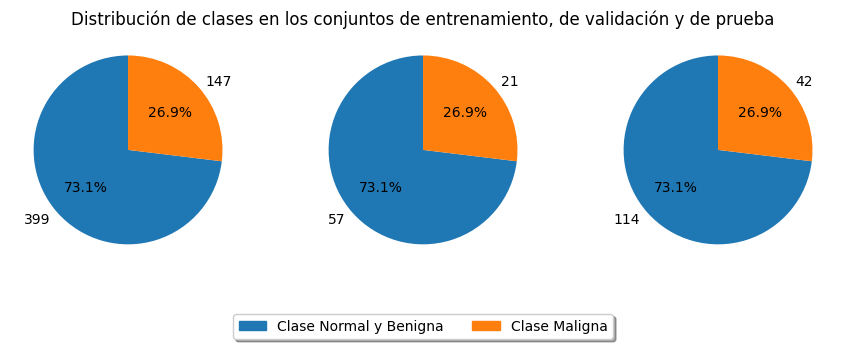

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

train_counts = pd.Series(y_train).value_counts()
wedges1, texts1, autotexts1 = axes[0].pie(train_counts, labels=train_counts.values, autopct='%1.1f%%', startangle=90)

val_counts = pd.Series(y_val).value_counts()
wedges3, texts3, autotexts3 = axes[1].pie(val_counts, labels=val_counts.values, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución de clases en los conjuntos de entrenamiento, de validación y de prueba')

test_counts = pd.Series(y_test).value_counts()
wedges2, texts2, autotexts2 = axes[2].pie(test_counts, labels=test_counts.values, autopct='%1.1f%%', startangle=90)

handles = [plt.Rectangle((0,0),1,1, color=c) for c in plt.cm.tab10(np.arange(len(train_counts)))]
labels = ['Clase Normal y Benigna', 'Clase Maligna']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=len(train_counts))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


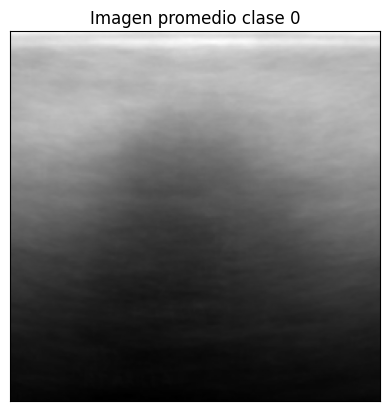

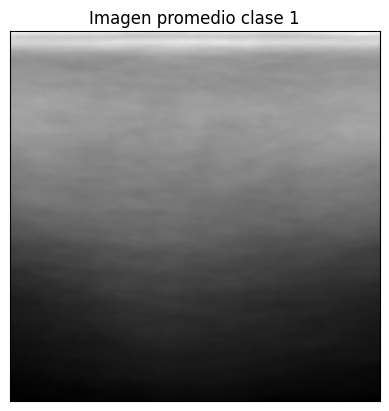

In [11]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.title('Imagen promedio clase 0')
plt.xticks([])
plt.yticks([])
plt.imshow(mean_0.squeeze(), cmap='gray')

plt.show()

plt.imshow(mean_1.squeeze(), cmap='gray')
plt.title('Imagen promedio clase 1')
plt.xticks([])
plt.yticks([])

plt.show()

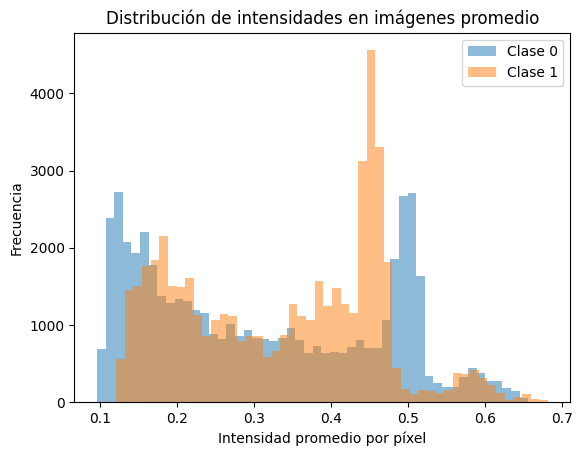

Clase 0 - Bajo: 52.06074617346939 % Medio: 47.93925382653061 % Alto: 0.0 %
Clase 1 - Bajo: 41.392299107142854 % Medio: 58.607700892857146 % Alto: 0.0 %


In [12]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.hist(mean_0.ravel(), bins=50, alpha=0.5, label='Clase 0')
plt.hist(mean_1.ravel(), bins=50, alpha=0.5, label='Clase 1')
plt.xlabel('Intensidad promedio por píxel')
plt.ylabel('Frecuencia')
plt.title('Distribución de intensidades en imágenes promedio')
plt.legend()
plt.show()

def porcentaje_en_rango(imagen, low, high):
    total = imagen.size
    en_rango = np.logical_and(imagen >= low, imagen <= high).sum()
    return 100 * en_rango / total

r0_bajo = porcentaje_en_rango(mean_0, 0.0, 0.3)
r0_medio = porcentaje_en_rango(mean_0, 0.3, 0.7)
r0_alto = porcentaje_en_rango(mean_0, 0.7, 1.0)

r1_bajo = porcentaje_en_rango(mean_1, 0.0, 0.3)
r1_medio = porcentaje_en_rango(mean_1, 0.3, 0.7)
r1_alto = porcentaje_en_rango(mean_1, 0.7, 1.0)

print("Clase 0 - Bajo:", r0_bajo, "% Medio:", r0_medio, "% Alto:", r0_alto, "%")
print("Clase 1 - Bajo:", r1_bajo, "% Medio:", r1_medio, "% Alto:", r1_alto, "%")



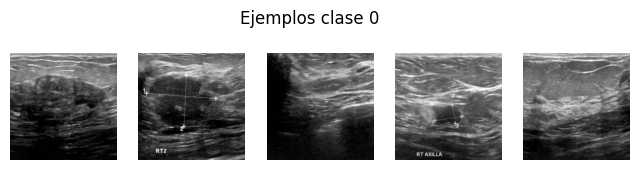

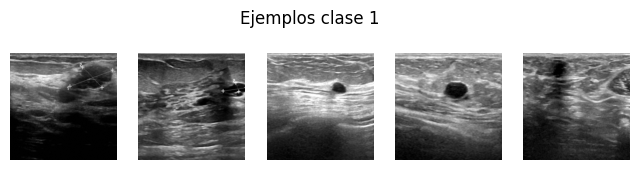

In [13]:
samples_0 = random.sample([img for img, label in datasetCompleto if label == 0], 5)
samples_1 = random.sample([img for img, label in datasetCompleto if label == 1], 5)
fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_0):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 0')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_1):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 1')
plt.show()

In [14]:
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f'Shape de x_train: {x_train.shape}')
print(f'Shape de x_val: {x_val.shape}')
print(f'Shape de x_test: {x_test.shape}')

Shape de x_train: (546, 224, 224, 1)
Shape de x_val: (78, 224, 224, 1)
Shape de x_test: (156, 224, 224, 1)


# CNN Base

Basada en la red vista en clases

In [19]:
modeloBase = models.Sequential([
    # Primera convolución: 10 filtros, kernel 5x5, entrada 224x224x1
    layers.Conv2D(10, (5,5), activation='relu', input_shape=(224,224,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    # Segunda convolución: 20 filtros, kernel 5x5
    layers.Conv2D(20, (5,5), activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

modeloBase.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\bobaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
tensorboardBase = TensorBoard(log_dir='logs/base')
modeloBase.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[tensorboardBase]
)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.5755 - loss: 0.9711 - val_accuracy: 0.7308 - val_loss: 0.5520
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.7108 - loss: 0.6071 - val_accuracy: 0.7564 - val_loss: 0.5717
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.7758 - loss: 0.5234 - val_accuracy: 0.8590 - val_loss: 0.4096
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - accuracy: 0.7788 - loss: 0.4747 - val_accuracy: 0.7949 - val_loss: 0.5154
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.8156 - loss: 0.4477 - val_accuracy: 0.8590 - val_loss: 0.4131
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.8544 - loss: 0.3704 - val_accuracy: 0.8205 - val_loss: 0.4679
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.8602 - loss: 0.3440 - val_accuracy: 0.8718 - val_loss: 0.3485
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.8900 - loss: 0.2655 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


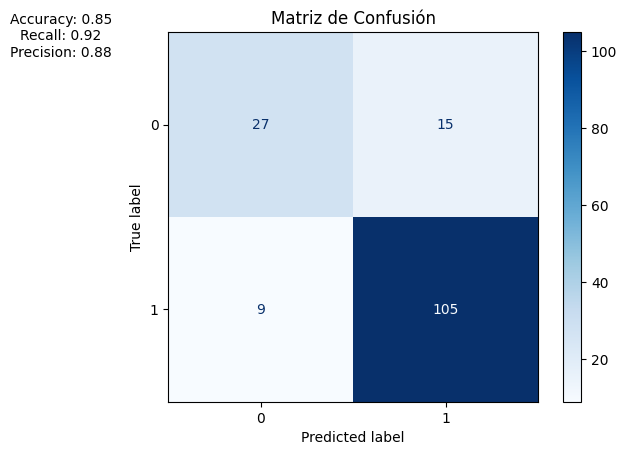

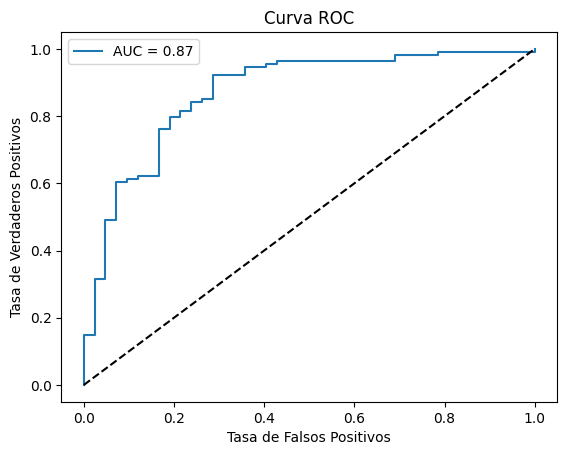

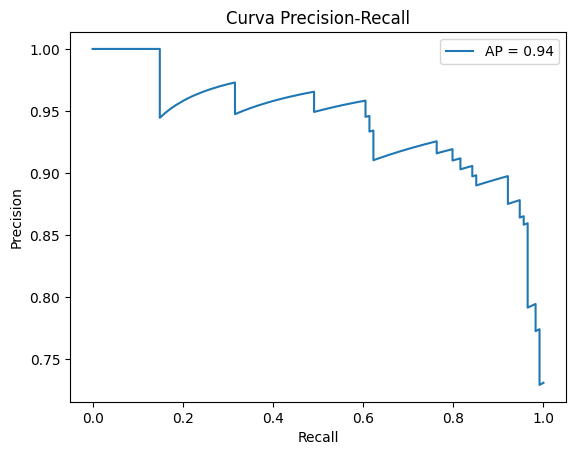

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

# Predicciones del modelo
y_pred_prob = modeloBase.predict(x_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Calcular métricas
accuracy = (y_pred == y_test).mean()
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

plt.title('Matriz de Confusión')
plt.suptitle(f'Accuracy: {accuracy:.2f}\nRecall: {recall:.2f}\nPrecision: {precision:.2f}', fontsize=10, y=0.92, x=0)
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
ap = average_precision_score(y_test, y_pred_prob)
plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()